In [116]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [117]:
import numpy as np
import scipy as sp

import statsmodels as sm
import matplotlib.pylab as plt
import pandas as pd
import statsmodels.api as smapi

from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.stattools import acf
from statsmodels.tsa.stattools import pacf
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.tsa.arima_model import ARIMA
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
import math





Simularemos procesos que tienen raíces unitarias, es decir procesos con tendecía estocástica.Veamos el primer ejemplo:<br>
$(1-B)(1-0.5B)X_{t}=(X_t-1.5X_{t-1}+0.5X_{t-2})=Z_{t}$, esto corresponde a un proceso ARIMA(1,1,0)

1

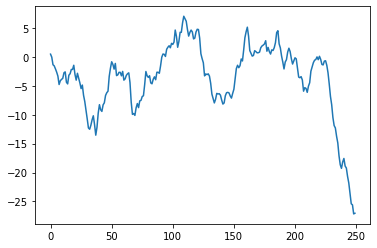

In [118]:

Tlength=250
arparams = np.array([-1.5, 0.5])
#maparams = np.array([.65, .35])
ar = np.r_[1, arparams] # add zero-lag 
ma = np.r_[1] # add zero-lag y maparams tiene los otros parámetros
y1 = sm.tsa.arima_process.arma_generate_sample(ar, ma,Tlength)
plt.plot(y1)
y1.ndim
#plt.savefig('ARIMA.pdf')

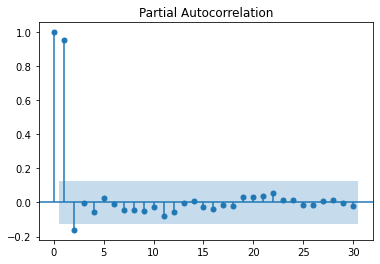

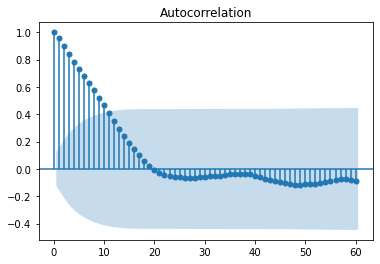

In [119]:
graph1=plot_pacf(y1,lags=30,method='ldbiased')###Note que parece un AR(2)
graph2=plot_acf(y1,lags=60,adjusted=False)


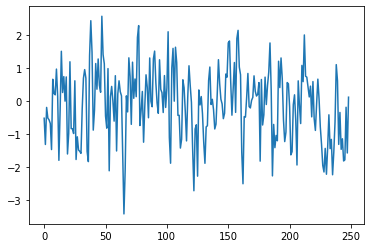

In [121]:
diffy1=np.diff(y1,n=1)#### n es el orden de integración del procesos ARIMA, es decir, d.
plt.plot(diffy1)
#plt.savefig('TSTU25.pdf')

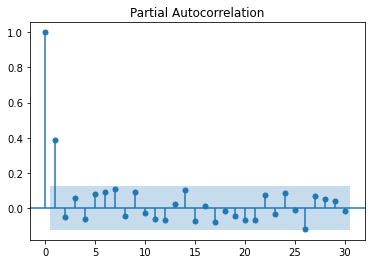

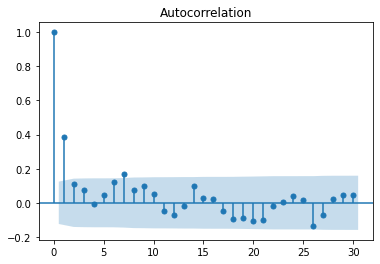

In [122]:
graph1=plot_pacf(diffy1,lags=30,method='ldbiased')
graph2=plot_acf(diffy1,lags=30,adjusted=False)

In [7]:

modeloarima1=smapi.tsa.statespace.SARIMAX(y1, trend='n', order=(1,1,0))
ajustearima=modeloarima1.fit()
ajustearima.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  250
Model:               SARIMAX(1, 1, 0)   Log Likelihood                -371.897
Date:                Sun, 20 Jun 2021   AIC                            747.794
Time:                        15:03:02   BIC                            754.829
Sample:                             0   HQIC                           750.626
                                - 250                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5069      0.058      8.715      0.000       0.393       0.621
sigma2         1.1596      0.100     11.609      0.000       0.964       1.355
===================================================================================
Ljung-Box (L1) (Q):                   0.16   Jarque-Bera (JB):                 0.55
Prob(Q):                              0.69   Prob(JB):                         0.76
Heteroskedasticity (H):               0.99   Skew:                             0.08
Prob(H) (two-sided):                  0.95   Kurtosis:                         3.16
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

Tenemos, caminata Aleatoria con drift, es decir, 
$X_{t}=c+X_{t-1}+Z_{t}$ y Caminata Aleatoria alrededor de una recta $X_{t}=c+\beta t+Z_{t}$

In [8]:
inic=50
c=1
beta=1.1
tiempo=np.arange(1, Tlength+inic+2, 1)
#xt=beta*tiempo

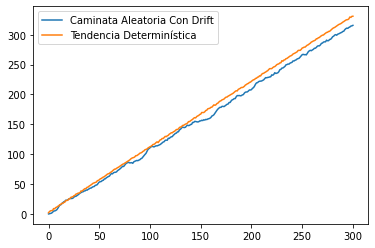

In [20]:
Zt=np.random.normal(0,0.5,Tlength+inic+1)###Cambiar los valores de la varianza
w=np.random.normal(loc=0.0, scale=1.0, size=Tlength+inic+1)
x=np.cumsum(w)
wd=w+c
xd=np.cumsum(wd)

Xtdrift=np.zeros(Tlength+inic+1)
XtRWlin=np.zeros(Tlength+inic+1)
for t in range(Tlength+inic+1):
    #XtRWlin[t]=c+beta*tiempo[t]+XtRWlin[t-1]+Zt[t]###Caminata aleatoria alrededor de una recta
    XtRWlin[t]=c+beta*tiempo[t]+Zt[t]###Modelo con tendencia determinística

Xtdrift=xd
plt.plot(Xtdrift,label='Caminata Aleatoria Con Drift')
plt.plot(XtRWlin,label='Tendencia Determinística')
plt.legend()
#plt.show()
#plt.savefig('ARIMADriftDetermin.pdf')

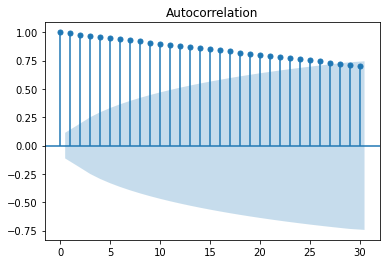

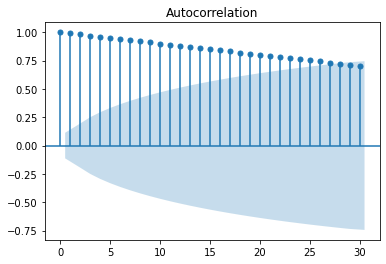

In [21]:
fig1=plot_acf(Xtdrift,lags=30,adjusted=False)
fig2=plot_acf(XtRWlin,lags=30,adjusted=False)
#plt.savefig('TSTU24.pdf')

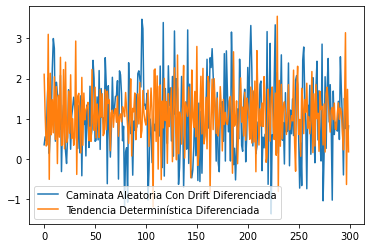

In [22]:
diffXtdrift=np.diff(Xtdrift,n=1)
diffXtRWlin=np.diff(XtRWlin,n=1)
plt.plot(diffXtdrift,label='Caminata Aleatoria Con Drift Diferenciada')
plt.plot(diffXtRWlin,label='Tendencia Determinística Diferenciada')
plt.legend()
#plt.savefig('TSTU28.pdf')

Consideremos un modelo autoregresivo que tiene raíces unitarias en $z=\exp(i\theta)$ y en su conjugada $z=\exp(-i\theta)$. Note que esas raíces están sobre el círculo unitario, es decir debe producir un proceso que es no estacionario. Es decir, el modelo que vamos a cosiderar es de la forma $(1-\exp(i\theta)B)(1-\exp(-i\theta)B)=Z_t$, el cual es equivalente a $(1-2\cos\theta B+B^2)X_t=Z_t$.Escojamos el valor de $\theta=\frac{\pi}{3}$.

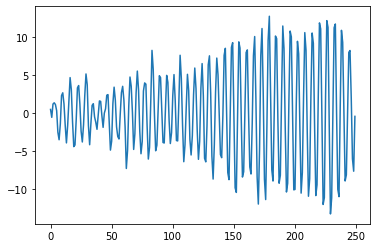

In [23]:

theta=(math.pi)/3
Tlength=250
arparams = np.array([-2*math.cos(theta),1])
#maparams = np.array([.65, .35])
ar = np.r_[1, arparams] # add zero-lag 
ma = np.r_[1] # add zero-lag y maparams tiene los otros parámetros
y2 = sm.tsa.arima_process.arma_generate_sample(ar, ma,Tlength)
plt.plot(y2)####Note el comportamiento periodico

#plt.savefig('TSTU26.pdf')

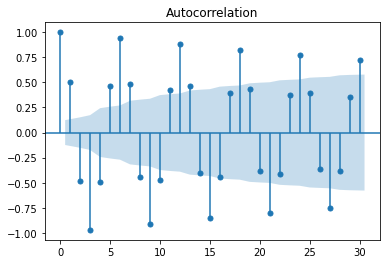

In [24]:
fig1=plot_acf(y2,lags=30,adjusted=False)
#plt.savefig('TSTU27.pdf')

Prueba de Dickey Fuller, en diferentes escenarios.

In [25]:
from statsmodels.tsa.stattools import adfuller
help(adfuller)

Help on function adfuller in module statsmodels.tsa.stattools:

adfuller(x, maxlag=None, regression='c', autolag='AIC', store=False, regresults=False)
    Augmented Dickey-Fuller unit root test.
    
    The Augmented Dickey-Fuller test can be used to test for a unit root in a
    univariate process in the presence of serial correlation.
    
    Parameters
    ----------
    x : array_like, 1d
        The data series to test.
    maxlag : int
        Maximum lag which is included in test, default 12*(nobs/100)^{1/4}.
    regression : {"c","ct","ctt","nc"}
        Constant and trend order to include in regression.
    
        * "c" : constant only (default).
        * "ct" : constant and trend.
        * "ctt" : constant, and linear and quadratic trend.
        * "nc" : no constant, no trend.
    
    autolag : {"AIC", "BIC", "t-stat", None}
        Method to use when automatically determining the lag.
    
        * if None, then maxlag lags are used.
        * if "AIC" (default) or 

In [120]:
resultadoadf=adfuller(y1,regression="nc",autolag=None, maxlag=1)####maxlag es importante
#resultadoadf=adfuller(y1,maxlag=3,autolag=None,regression="nc")
##Se debe elegir un lagmax grande y ver si el valor t de el último coeficiente de la variable
###Diferenciada es significativo(>1.6 en valor absoluto), si así lo es se lleva a cabo el test de Dickey Fuller
###Si no lo es, hay que reducir el rezago.
print('ADF Statistic: %f' % resultadoadf[0])
print('P-value: %f' % resultadoadf[1])
for key, value in resultadoadf[4].items():
    print('\t%s: %.3f' % (key, value))

adfstat, pvalue, critvalues, resstore=adfuller(y1,regression="nc",maxlag=1,autolag=None,store=True,regresults=True)####maxlag es importante
resstore.resols.summary()
#pvalue
  
###Al no rechazarse la hipótesis nula implica que existe raíz unitaria.

ADF Statistic: 0.158999
P-value: 0.734611
	1%: -2.575
	5%: -1.942
	10%: -1.616


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.155
Model:                            OLS   Adj. R-squared (uncentered):              0.148
Method:                 Least Squares   F-statistic:                              22.61
Date:                Wed, 23 Jun 2021   Prob (F-statistic):                    9.67e-10
Time:                        12:40:39   Log-Likelihood:                         -351.30
No. Observations:                 248   AIC:                                      706.6
Df Residuals:                     246   BIC:                                      713.6
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.0015      0.009      0.159      0.874      -0.017       0.020
x2             0.3911      0.061      6.423      0.000       0.271       0.511
==============================================================================
Omnibus:                        1.738   Durbin-Watson:                   1.959
Prob(Omnibus):                  0.419   Jarque-Bera (JB):                1.598
Skew:                          -0.090   Prob(JB):                        0.450
Kurtosis:                       2.650   Cond. No.                         6.71
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [16]:
%qtconsole

ADF Statistic: -0.300747
P-value: 0.925399
	1%: -3.453
	5%: -2.872
	10%: -2.572


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.486
Model:                            OLS   Adj. R-squared:                  0.461
Method:                 Least Squares   F-statistic:                     19.91
Date:                Sun, 20 Jun 2021   Prob (F-statistic):           1.17e-32
Time:                        15:16:59   Log-Likelihood:                -220.26
No. Observations:                 288   AIC:                             468.5
Df Residuals:                     274   BIC:                             519.8
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -0.0001      0.000     -0.301      0.764      -0.001       0.001
x2            -0.9341      0.060    -15.450      0.000      -1.053      -0.815
x3            -0.8851      0.082    -10.805      0.000      -1.046      -0.724
x4            -0.8604      0.097     -8.852      0.000      -1.052      -0.669
x5            -0.7602      0.109     -6.947      0.000      -0.976      -0.545
x6            -0.5650      0.117     -4.812      0.000      -0.796      -0.334
x7            -0.4201      0.120     -3.504      0.001      -0.656      -0.184
x8            -0.4119      0.120     -3.419      0.001      -0.649      -0.175
x9            -0.2673      0.118     -2.267      0.024      -0.499      -0.035
x10           -0.1758      0.110     -1.595      0.112      -0.393       0.041
x11           -0.2126      0.098     -2.173      0.031      -0.405      -0.020
x12           -0.1537      0.083     -1.858      0.064      -0.317       0.009
x13           -0.0348      0.060     -0.576      0.565      -0.154       0.084
const          7.3548      0.963      7.635      0.000       5.458       9.251
==============================================================================
Omnibus:                        2.507   Durbin-Watson:                   2.005
Prob(Omnibus):                  0.285   Jarque-Bera (JB):                2.189
Skew:                          -0.177   Prob(JB):                        0.335
Kurtosis:                       3.239   Cond. No.                     6.24e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.24e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

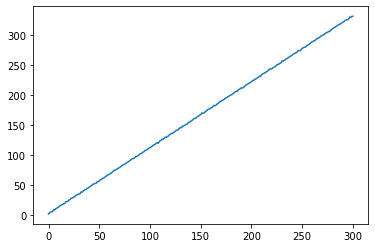

In [29]:
###serie con tendencia determinística
fig1=plt.plot(XtRWlin)
resultadoadfxtrwlin=adfuller(XtRWlin,regression='c',autolag=None,maxlag=12)
print('ADF Statistic: %f' % resultadoadfxtrwlin[0])
print('P-value: %f' % resultadoadfxtrwlin[1])
for key, value in resultadoadfxtrwlin[4].items():
    print('\t%s: %.3f' % (key, value))
    
adfstat, pvalue, critvalues, resstore=adfuller(XtRWlin,regression='c',autolag=None,maxlag=12,store=True,regresults=True)####maxlag es importante
resstore.resols.summary()

ADF Statistic: -0.113992
P-value: 0.948027
	1%: -3.453
	5%: -2.872
	10%: -2.572


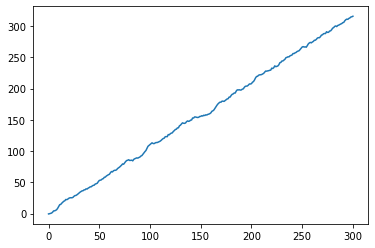

In [32]:
###serie con tendencia estocástica pero alrededor de una linea recta
fig1=plt.plot(Xtdrift)
#resultadoadfxtrwlin=adfuller(Xtdrift,regression="nc",autolag=None,maxlag=10)
resultadoadfxtrwlin=adfuller(Xtdrift,regression='c',autolag=None,maxlag=10)


print('ADF Statistic: %f' % resultadoadfxtrwlin[0])
print('P-value: %f' % resultadoadfxtrwlin[1])
for key, value in resultadoadfxtrwlin[4].items():
    print('\t%s: %.3f' % (key, value))

# Ejemplo de la serie de pasajeros

In [34]:

data = pd.read_csv('/Users/macbook/Documents/GitHub/TimeSeries/Bases de Datos/AirPassengers.csv')
print(data)
print('\n Data Types:')
print(data.dtypes)

       Month  NPassengers
0    1949-01          112
1    1949-02          118
2    1949-03          132
3    1949-04          129
4    1949-05          121
..       ...          ...
139  1960-08          606
140  1960-09          508
141  1960-10          461
142  1960-11          390
143  1960-12          432

[144 rows x 2 columns]

 Data Types:
Month          object
NPassengers     int64
dtype: object


pandas.core.series.Series

pandas.core.frame.DataFrame

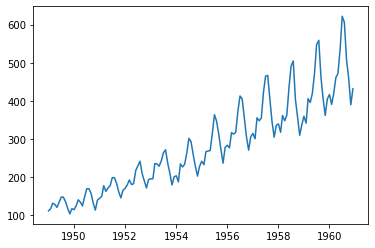

In [35]:
con=data['Month']
data['Month']=pd.to_datetime(data['Month'])
#####La otra forma es crear el índice de los datos
pasajeros=data.set_index('Month')
tsAirP = pasajeros['NPassengers']
plt.plot(tsAirP)
#plt.savefig('TSTU29.pdf')
type(tsAirP)
type(pasajeros)

Transformación Box-Cox $$f_{\lambda}(u_{t})= \left\{ \begin{array}{lc}
            \lambda^{-1}(u^{\lambda}_{t}-1)&  \ \lambda>0, u_{t} \geq 0\\             \ln(u_{t}) & u_{t}>0,\lambda=0.
             \end{array}
   \right. $$ 

In [36]:

###Chequear si hay necesidad de estabilizar varianza
sertrans,lambdaest,intlambda=sp.stats.boxcox(tsAirP,alpha=0.05)
lambdaest  ###Valor de lambda
intlambda  ###Intervalo donde posiblemente éste lambda

0.14802265137037945

(-0.23789863644607392, 0.533711499804654)

In [37]:
#help(sp.stats.boxcox)

numpy.ndarray

Text(0.5, 1.0, 'Transformación logarítmica Serie Pasajeros')

Text(0.5, 1.0, 'Serie de Pasajeros Original')

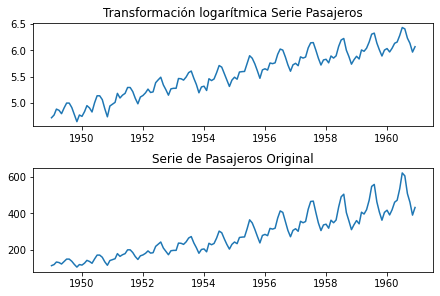

In [38]:
logAirp=sp.stats.boxcox(data['NPassengers'],lmbda=0)
type(logAirp)
data = data.assign(logAirp=logAirp)   

logpasajeros=data.set_index('Month')   
logAirPass=  logpasajeros['logAirp'] 
f, (ax1, ax2) = plt.subplots(ncols=1, nrows=2,constrained_layout=True)
ax1.plot(logAirPass)
ax1.set_title('Transformación logarítmica Serie Pasajeros')
ax2.plot(tsAirP)
ax2.set_title('Serie de Pasajeros Original')
#plt.savefig('TSTU30.pdf')


In [39]:
from statsmodels.tsa.stattools import adfuller
resultadoadf=adfuller(logAirPass,regression="nc",autolag=None, maxlag=12)####maxlag es importante
##Se debe elegir un lagmax grande y ver si el valor t de el último coeficiente de la variable
###Diferenciada es significativo(>1.6 en valor absoluto), si así lo es se lleva a cabo el test de Dickey Fuller
###Si no lo es, hay que reducir el rezago.
print('ADF Statistic: %f' % resultadoadf[0])
print('P-value: %f' % resultadoadf[1])
for key, value in resultadoadf[4].items():
    print('\t%s: %.3f' % (key, value))

adfstat, pvalue, critvalues, resstore=adfuller(logAirPass,regression="nc",maxlag=12,autolag=None,store=True,regresults=True)####maxlag es importante
resstore.resols.summary()
pvalue

ADF Statistic: 3.787199
P-value: 0.999999
	1%: -2.583
	5%: -1.943
	10%: -1.615


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.856
Model:                            OLS   Adj. R-squared (uncentered):              0.841
Method:                 Least Squares   F-statistic:                              54.14
Date:                Sun, 20 Jun 2021   Prob (F-statistic):                    2.06e-43
Time:                        15:19:53   Log-Likelihood:                          232.93
No. Observations:                 131   AIC:                                     -439.9
Df Residuals:                     118   BIC:                                     -402.5
Df Model:                          13                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.0054      0.001      3.787      0.000       0.003       0.008
x2            -0.1988      0.072     -2.758      0.007      -0.342      -0.056
x3            -0.2737      0.073     -3.734      0.000      -0.419      -0.129
x4            -0.2336      0.072     -3.233      0.002      -0.377      -0.091
x5            -0.2931      0.074     -3.965      0.000      -0.440      -0.147
x6            -0.2066      0.072     -2.867      0.005      -0.349      -0.064
x7            -0.2669      0.071     -3.734      0.000      -0.408      -0.125
x8            -0.2345      0.072     -3.264      0.001      -0.377      -0.092
x9            -0.3274      0.073     -4.473      0.000      -0.472      -0.182
x10           -0.1985      0.074     -2.696      0.008      -0.344      -0.053
x11           -0.2799      0.073     -3.850      0.000      -0.424      -0.136
x12           -0.1761      0.073     -2.412      0.017      -0.321      -0.032
x13            0.6274      0.073      8.632      0.000       0.483       0.771
==============================================================================
Omnibus:                        7.013   Durbin-Watson:                   2.360
Prob(Omnibus):                  0.030   Jarque-Bera (JB):                7.374
Skew:                           0.397   Prob(JB):                       0.0250
Kurtosis:                       3.849   Cond. No.                         309.
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

0.9999992645720288

# Prueba KPSS(Kwiatkowski-Phillips-Schmidt-Shin)

Null Hypothesis: The process is trend stationary.

Alternate Hypothesis: The series has a unit root (series is not stationary).

In [61]:
from statsmodels.tsa.stattools import kpss
def kpss_test(timeseries):
    print ('Results of KPSS Test:')
    kpsstest = kpss(timeseries, regression='c', nlags="auto")
    kpss_output = pd.Series(kpsstest[0:3], index=['Test Statistic','p-value','Lags Used'])
    for key,value in kpsstest[3].items():
        kpss_output['Critical Value (%s)'%key] = value
    print (kpss_output)

In [63]:
kpss_test(logAirPass)

Results of KPSS Test:
Test Statistic           1.668651
p-value                  0.010000
Lags Used                8.000000
Critical Value (10%)     0.347000
Critical Value (5%)      0.463000
Critical Value (2.5%)    0.574000
Critical Value (1%)      0.739000
dtype: float64


/Users/macbook/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/stattools.py:1874: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  )


## Diferenciación de la serie porque hay presencia de una raíz Unitaria

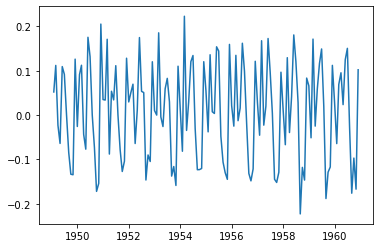

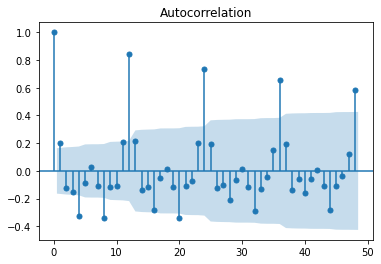

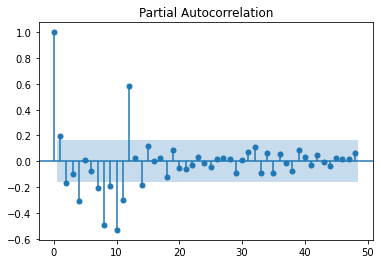

In [46]:
logdiff_1=logAirPass.diff(periods=1)[1:]
plt.plot(logdiff_1)
###Ahora procedemos a ajustar un modelo ARMA a la serie diferenciada
acf1=plot_acf(logdiff_1,lags=48,adjusted=False)
pacf1=plot_pacf(logdiff_1,lags=48,method='ldbiased')####Note que el  máximo orden p=12

Se vuelve a aplicar la prueba de Dickey-Fuller para ver si aún hay presencia de una raíz unitaria

In [47]:
resultadoadf=adfuller(logdiff_1,regression="nc",maxlag=10,autolag=None)####maxlag es importante
print('ADF Statistic: %f' % resultadoadf[0])
print('P-value: %f' % resultadoadf[1])
for key, value in resultadoadf[4].items():
    print('\t%s: %.3f' % (key, value))
    
adfstat, pvalue, critvalues, resstore=adfuller(logdiff_1,regression="nc",maxlag=10,autolag=None,store=True,regresults=True)####maxlag es importante
pvalue
resstore.resols.summary()

ADF Statistic: -7.327340
P-value: 0.000000
	1%: -2.583
	5%: -1.943
	10%: -1.615


1.1107234531299893e-11

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.689
Model:                            OLS   Adj. R-squared (uncentered):              0.661
Method:                 Least Squares   F-statistic:                              24.39
Date:                Sun, 20 Jun 2021   Prob (F-statistic):                    9.29e-26
Time:                        15:23:01   Log-Likelihood:                          153.49
No. Observations:                 132   AIC:                                     -285.0
Df Residuals:                     121   BIC:                                     -253.3
Df Model:                          11                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -3.7435      0.511     -7.327      0.000      -4.755      -2.732
x2             2.7497      0.454      6.056      0.000       1.851       3.649
x3             2.3346      0.420      5.556      0.000       1.503       3.167
x4             2.2244      0.367      6.065      0.000       1.498       2.951
x5             1.6739      0.341      4.906      0.000       0.998       2.349
x6             1.5583      0.293      5.315      0.000       0.978       2.139
x7             1.2121      0.256      4.736      0.000       0.705       1.719
x8             1.0805      0.202      5.339      0.000       0.680       1.481
x9             0.5095      0.175      2.916      0.004       0.164       0.855
x10            0.4164      0.124      3.350      0.001       0.170       0.662
x11           -0.0227      0.092     -0.247      0.806      -0.205       0.160
==============================================================================
Omnibus:                        0.767   Durbin-Watson:                   1.977
Prob(Omnibus):                  0.681   Jarque-Bera (JB):                0.861
Skew:                          -0.088   Prob(JB):                        0.650
Kurtosis:                       2.645   Cond. No.                         29.4
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Arima automático

In [48]:
from pmdarima.arima import auto_arima
auto = auto_arima(logdiff_1, error_action='ignore',max_p=12 ,max_q=12,max_order=12,seasonal=False, m=12,information_criterion='bic')
auto.summary()

/Users/macbook/opt/anaconda3/lib/python3.8/site-packages/pmdarima/arima/_validation.py:62: UserWarning: m (12) set for non-seasonal fit. Setting to 0
  warnings.warn("m (%i) set for non-seasonal fit. Setting to 0" % m)


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  143
Model:               SARIMAX(2, 0, 1)   Log Likelihood                 139.446
Date:                Sun, 20 Jun 2021   AIC                           -268.892
Time:                        15:23:12   BIC                           -254.078
Sample:                             0   HQIC                          -262.872
                                - 143                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0042      0.001      5.806      0.000       0.003       0.006
ar.L1          1.0397      0.083     12.588      0.000       0.878       1.202
ar.L2         -0.4536      0.088     -5.171      0.000      -0.626      -0.282
ma.L1         -0.9690      0.049    -19.860      0.000      -1.065      -0.873
sigma2         0.0085      0.002      5.532      0.000       0.005       0.012
===================================================================================
Ljung-Box (L1) (Q):                   1.59   Jarque-Bera (JB):                 7.11
Prob(Q):                              0.21   Prob(JB):                         0.03
Heteroskedasticity (H):               1.17   Skew:                             0.12
Prob(H) (two-sided):                  0.58   Kurtosis:                         1.93
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

# Ajuste del modelo

In [49]:

####Ajuste del modelo
modelofinal = sm.tsa.statespace.sarimax.SARIMAX(logAirPass, trend='c',order=(12,1,0))  
results_final = modelofinal.fit()####useboxcox=
print(results_final.summary())



/Users/macbook/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/macbook/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


                               SARIMAX Results                                
Dep. Variable:                logAirp   No. Observations:                  144
Model:              SARIMAX(12, 1, 0)   Log Likelihood                 246.415
Date:                Sun, 20 Jun 2021   AIC                           -464.829
Time:                        15:23:16   BIC                           -423.349
Sample:                    01-01-1949   HQIC                          -447.974
                         - 12-01-1960                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0314      0.007      4.336      0.000       0.017       0.046
ar.L1         -0.2250      0.068     -3.311      0.001      -0.358      -0.092
ar.L2         -0.2731      0.067     -4.070      0.0

/Users/macbook/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


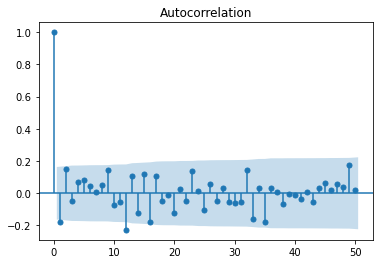

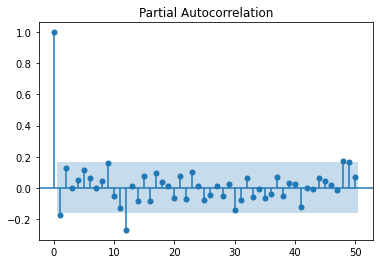

In [50]:
#results_final.standardized_forecasts_error.reshape(144,)
fig1=plot_acf(results_final.standardized_forecasts_error.reshape(144,),lags=50,adjusted=False)
fig2=plot_pacf(results_final.standardized_forecasts_error.reshape(144,),lags=50,method='ldbiased')



array([[0.50818667, 0.02082761]])

array([[6.66051127, 0.03578396, 0.31600971, 3.84758451]])

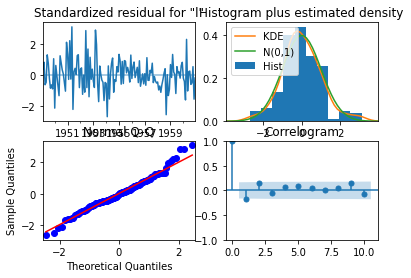

In [53]:
#####Análisis de Residuales######
residuales=results_final.resid####Residuales no estandarizados

graf_resid=results_final.plot_diagnostics()
#plt.show()
## Hipótesis nula de no heterocedasticidad
results_final.test_heteroskedasticity(method='breakvar') #[Est. de prueba, p-valor]
## Hipótesis nula de normalidad
results_final.test_normality(method='jarquebera')
#1. Estadística de prueba
#2. El p valor
#3. Sesgo estimado de los datos
#4. Curtosis estimada
## Hipótesis nula indica que no se presenta correlación serial




In [57]:
results_final.test_serial_correlation(method='ljungbox')
###Primero, valor de la estadística, luego valor p.


array([[[ 4.57275253,  7.97210168,  8.28443203,  9.03946122,
         10.09896159, 10.40939502, 10.41420453, 10.85892339,
         13.99896629, 14.76731465],
        [ 0.03248433,  0.01857292,  0.04048495,  0.06012067,
          0.07247929,  0.1084368 ,  0.16629049,  0.20982165,
          0.122362  ,  0.14077823]]])

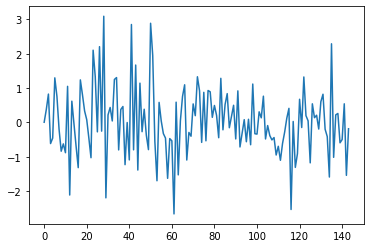

In [93]:
##Residuales Estandarizados
Res_estand=results_final.standardized_forecasts_error.reshape(144,)
plt.plot(Res_estand)



144

Text(0.5, 0, 't')

Text(0, 0.5, 'Cusm')

Text(0.5, 1.0, 'Estadística Cusum')

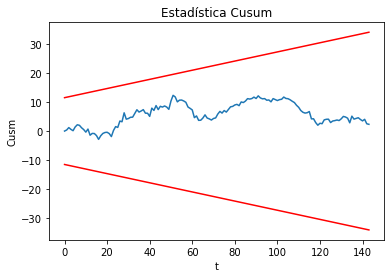

In [107]:
cum=Res_estand.cumsum()
N=len(Res_estand)
N
Af_cusum=0.948###Cuantil estadística cusum
LS=Af_cusum*math.sqrt(N)+2*Af_cusum*np.arange(1,N+1)/math.sqrt(N)
LI=-LS
plt.plot(cum)
plt.plot(LS,color='red')
plt.plot(LI,color='red')
plt.xlabel("t")
plt.ylabel("Cusm")
plt.title('Estadística Cusum')

Text(0.5, 0, 't')

Text(0, 0.5, 'Cusm')

Text(0.5, 1.0, 'Estadística Cusumsq')

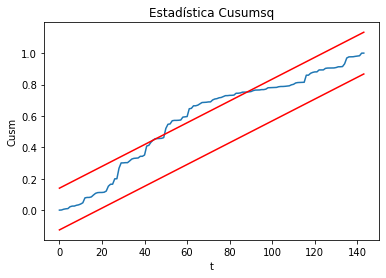

In [115]:
cumq=(Res_estand**2).cumsum()/sum(Res_estand**2)
co=0.13291####Valor del cuantil aproximado para cusumsq para n/2
LQS=co+np.arange(1,N+1)/N
LQI=-co+np.arange(1,N+1)/N
plt.plot(cumq)
plt.plot(LQS,color='red')
plt.plot(LQI,color='red')
plt.xlabel("t")
plt.ylabel("Cusm")
plt.title('Estadística Cusumsq')

# Fase de pronóstico

In [58]:
salforecast=results_final.get_forecast(steps=12)
ICforecast95=salforecast.conf_int(alpha=0.05)
pronosticos=salforecast.predicted_mean
pronosticos
ICforecast95

1961-01-01    6.112992
1961-02-01    6.058184
1961-03-01    6.126475
1961-04-01    6.218342
1961-05-01    6.267044
1961-06-01    6.393610
1961-07-01    6.539655
1961-08-01    6.501407
1961-09-01    6.353356
1961-10-01    6.252833
1961-11-01    6.104603
1961-12-01    6.191057
Freq: MS, Name: predicted_mean, dtype: float64

,lower logAirp,upper logAirp
1961-01-01,6.033606,6.192377
1961-02-01,5.957748,6.158620
1961-03-01,6.016878,6.236073
1961-04-01,6.104037,6.332646
1961-05-01,6.150720,6.383368
1961-06-01,6.275810,6.511410
1961-07-01,6.421069,6.658240
1961-08-01,6.382426,6.620388
1961-09-01,6.234364,6.472347
1961-10-01,6.133739,6.371928


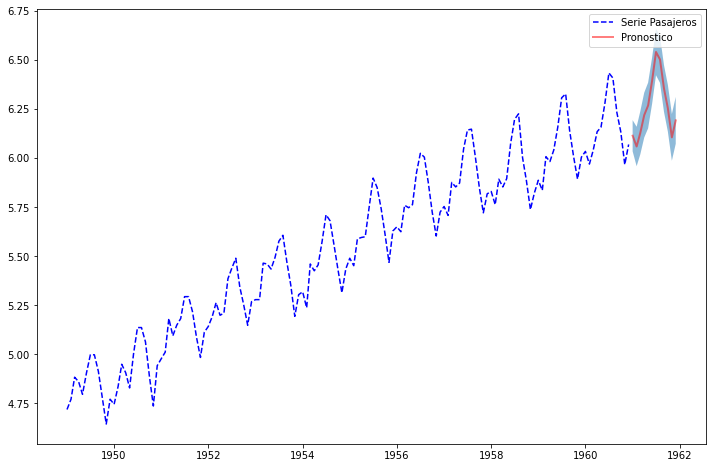

In [59]:
####Note que son los pronosticos de serie sin volver a la escala original
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(1,1,1)
#Serie actual
ax.plot(logAirPass.astype('float64'), '--', color="blue", label='Serie Pasajeros')
# Pronóstico
ax.plot(pronosticos, lw=2, color="red", alpha=0.5, label='Pronostico')
ax.fill_between(pronosticos.index, ICforecast95.iloc[:, 0], ICforecast95.iloc[:, 1], alpha=0.5)
ax.legend(loc='upper right')
plt.draw()

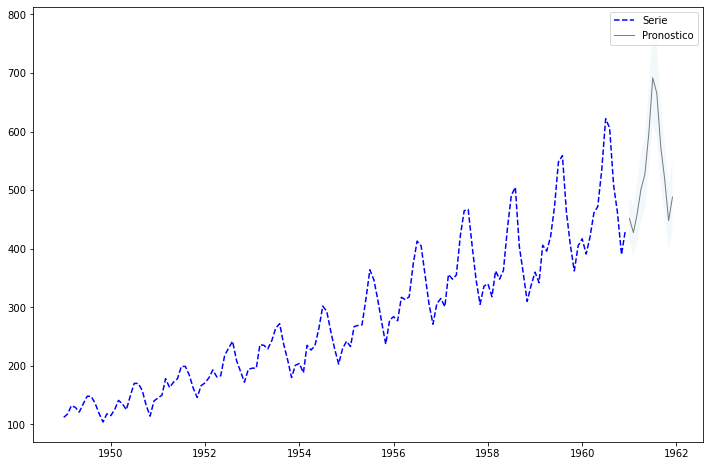

In [60]:
###Reescalar#####
pronosticos_inboxcox=sp.special.inv_boxcox(np.array(pronosticos[0:]),0)
ICinfforecast95_invbox=sp.special.inv_boxcox(np.array(ICforecast95.iloc[:,0]),0)
ICsupforecast95_invbox=sp.special.inv_boxcox(np.array(ICforecast95.iloc[:,1]),0)
pronosticos_inboxcox=pd.Series(pronosticos_inboxcox,index=pronosticos.index)

fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(1,1,1)
#Serie actual
ax.plot(tsAirP.astype('float64'), '--', color="blue", label='Serie')
# Pronóstico
ax.plot(pronosticos_inboxcox, lw=1, color="black", alpha=0.5, label='Pronostico')
ax.fill_between(pronosticos.index, ICinfforecast95_invbox, ICsupforecast95_invbox, alpha=0.05)
ax.legend(loc='upper right')
plt.draw()

# Análisis de Presencia de Estacionalidad

## Periodograma 

24
0.16783216783216784


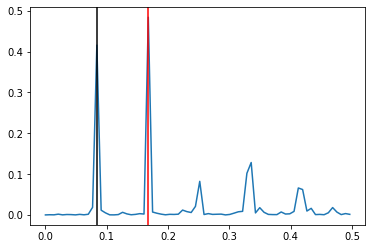

In [77]:
f, Pxx_den=sp.signal.periodogram(logdiff_1)
plt.plot(f, Pxx_den)

max_index_value = np.argmax(Pxx_den, axis=0)
print(max_index_value)
frecuencia_max=f[max_index_value]
print(frecuencia_max)
plt.axvline(x=frecuencia_max,color='red')
plt.axvline(x=frecuencia_max/2,color='black')

/Users/macbook/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1961: UserWarning: nperseg = 256 is greater than input length  = 143, using nperseg = 143
  warnings.warn('nperseg = {0:d} is greater than input length '


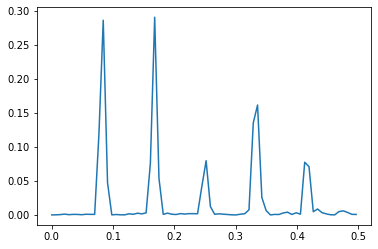

In [74]:
f_welch, Pxx_den_welch=sp.signal.welch(logdiff_1)
plt.plot(f_welch, Pxx_den_welch)

In [80]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf,month_plot,quarter_plot

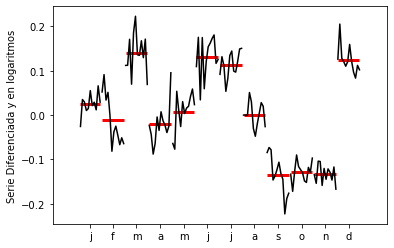

In [82]:
meses_logdiff_1=month_plot(logdiff_1,ylabel='Serie Diferenciada y en logaritmos')